In [ ]:
#import lib 
import pandas as pd 
import numpy as np 
# Basic Visualization tools
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns

In [ ]:
import pandas as pd 
df=pd.read_csv("datas.csv",encoding='ISO-8859-1',sep=";",quotechar='"') #import dataset
df

,Année,Mois,encours de la dette BTA,encours de la dette BTCT,Masse monetaire M3,Deficit commerciale,niveau globale de refinancement,degradation selon fitch,degradation selon Moody s,degradation selon S&P
0,2011,janv,"5683091,03","155937,931",44237,"-771,6","1645029,61",1,1,1
1,2011,fev,5683090,"148026,923",44647,"-509,1","2083935,14",0,0,0
2,2011,mars,"5703800,34","146455,172",44635,"-598,4","1879481,23",1,0,1
3,2011,Avr,5737970,172140,45237,"-767,9","1536511,33",0,0,0
4,2011,mai,"5817202,9","181425,806",44570,"-441,6","2313061,87",0,0,0
...,...,...,...,...,...,...,...,...,...,...
127,2021,Aout,16667286,"4559363,61",102094,"-1275,4","11504415,6",0,0,0
128,2021,Sept,16683286,"5052578,67",102762,"-1439,5","11223192,4",0,0,0
129,2021,Oct,"16765318,3","4582705,55",104430,"-1556,3","10137544,7",0,1,0
130,2021,Nov,"16593977,4","3679780,67",103438,"-1345,9","8981145,27",0,0,0


In [ ]:
df.info() #info about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Année                            132 non-null    int64 
 1   Mois                             132 non-null    object
 2   encours de la dette BTA          132 non-null    object
 3   encours de la dette BTCT         132 non-null    object
 4   Masse monetaire M3               132 non-null    int64 
 5   Deficit commerciale              132 non-null    object
 6   niveau globale de refinancement  132 non-null    object
 7   degradation selon fitch          132 non-null    int64 
 8   degradation selon Moody s        132 non-null    int64 
 9   degradation selon S&P            132 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 10.4+ KB


In [ ]:
df.isnull().sum() # missing value

Année                              0
Mois                               0
encours de la dette BTA            0
encours de la dette BTCT           0
Masse monetaire M3                 0
Deficit commerciale                0
niveau globale de refinancement    0
degradation selon fitch            0
degradation selon Moody s          0
degradation selon S&P              0
dtype: int64

In [ ]:
def make_float(num):
    num = num.replace(u'\N{MINUS SIGN}', '-')  # encode the minus sign
    num = num.replace(',','.') #change the decimal separator from comma to dot
    num = num.replace(unichr(160), '') # encode the (non-breaking) space to ''
    num = float(num)
    return num

In [ ]:
df["encours de la dette BTA"] = df['encours de la dette BTA'].str.replace(',', '.').astype(float)
df["encours de la dette BTCT"] = df['encours de la dette BTCT'].str.replace(',', '.').astype(float)
df["Deficit commerciale"] = df['Deficit commerciale'].str.replace(',', '.').astype(float)
df["niveau globale de refinancement"] = df['niveau globale de refinancement'].str.replace(',', '.').astype(float)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Table(header=dict(values=df.columns), 
             cells=dict(values=df.head(132).T))
)

fig.show()

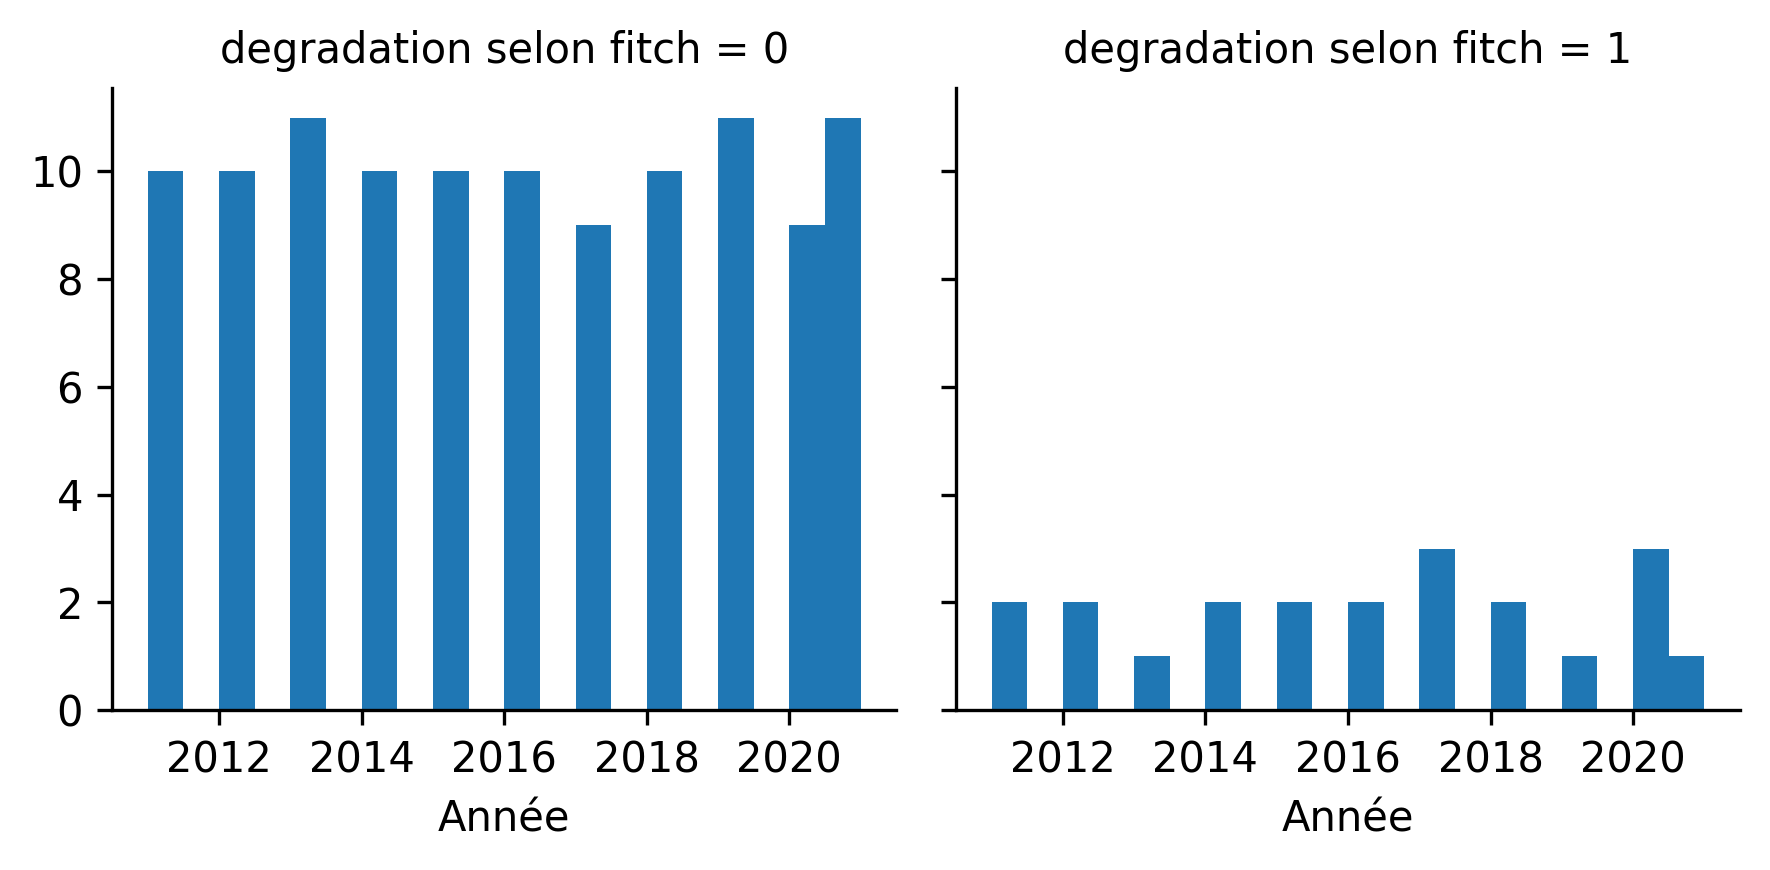

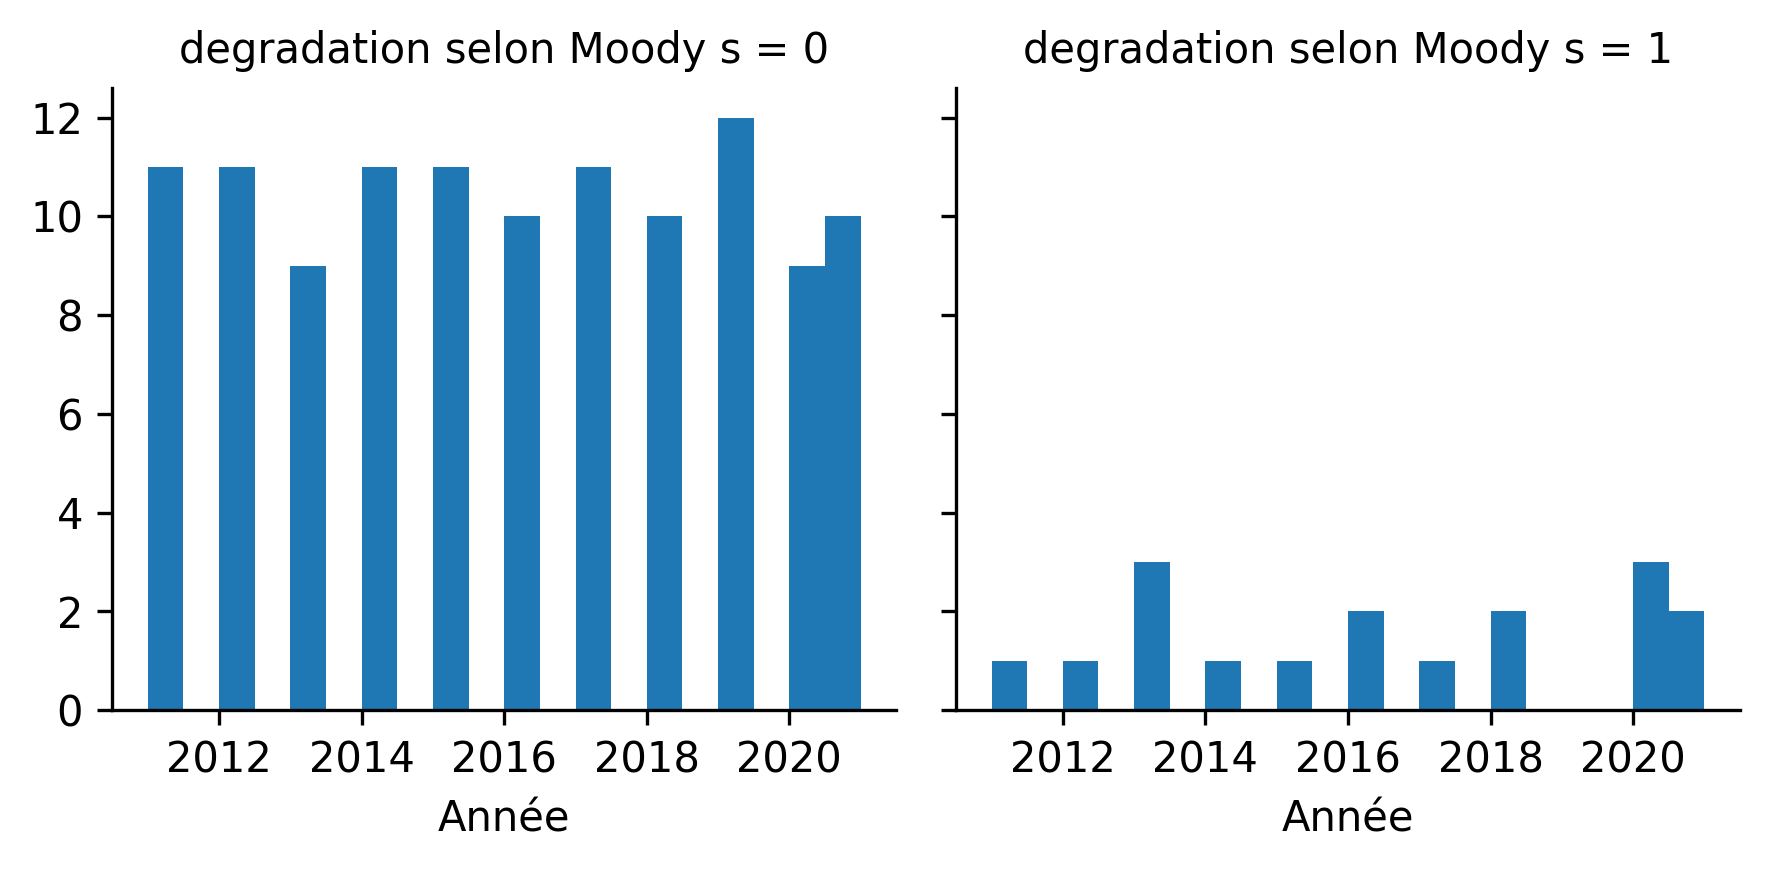

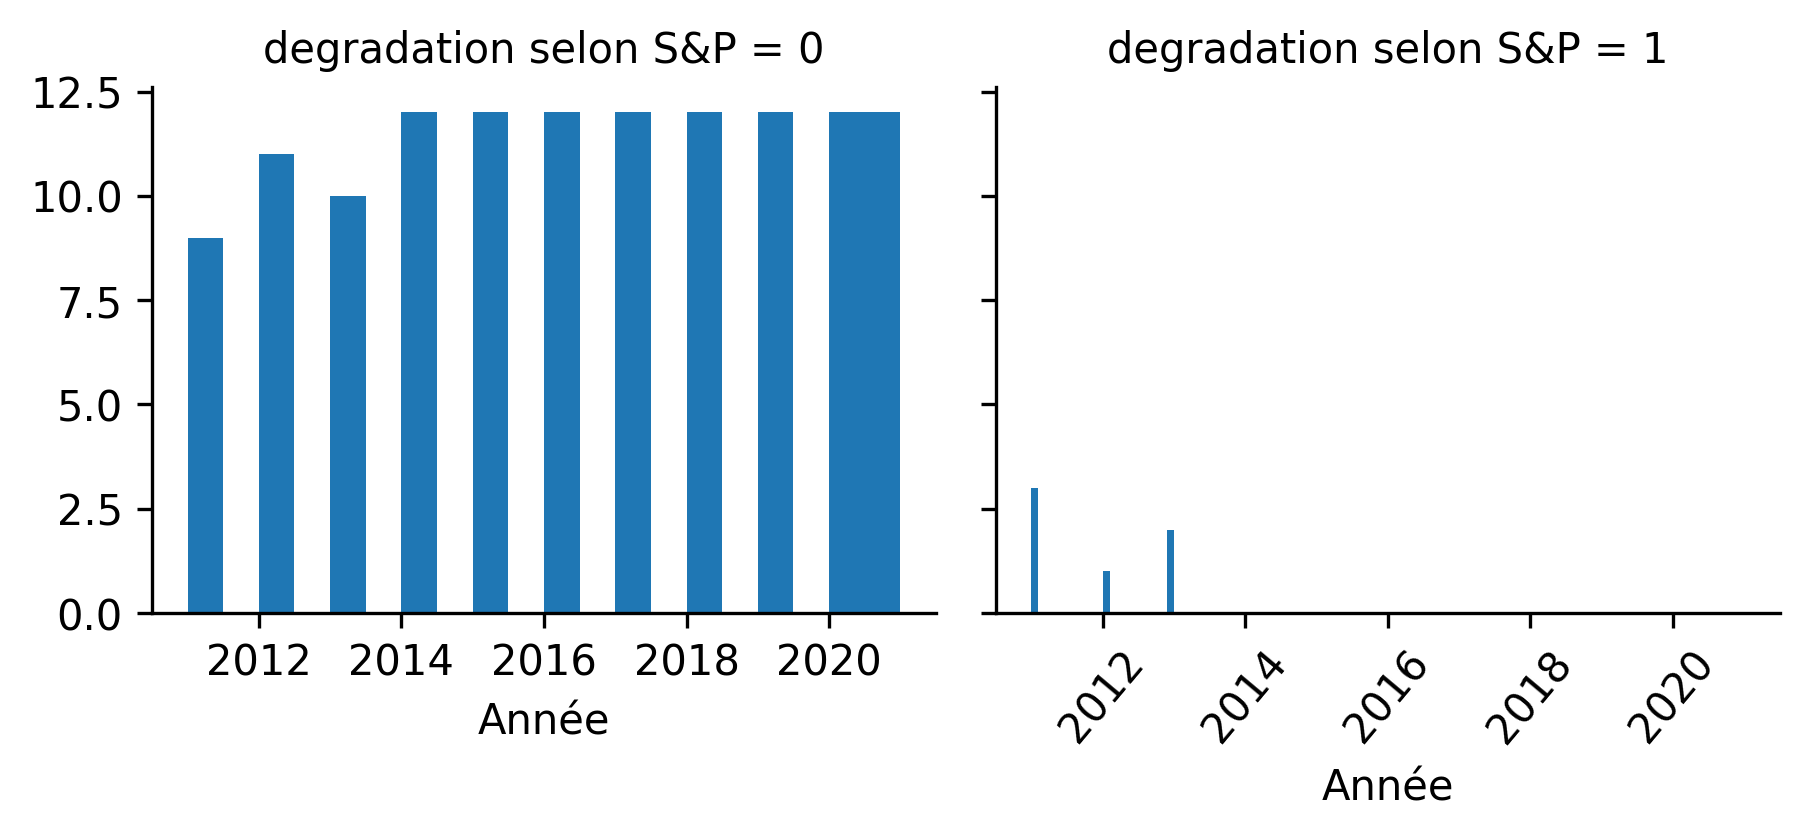

In [ ]:
df=pd.read_csv("datas.csv",encoding='ISO-8859-1',sep=";") 
g=sns.FacetGrid(df, col="degradation selon fitch")
g1=sns.FacetGrid(df, col="degradation selon Moody s")
g2=sns.FacetGrid(df, col="degradation selon S&P")

plt.xticks(rotation=50)

g.map(plt.hist,"Année",bins=20)
g1.map(plt.hist,"Année",bins=20)
g2.map(plt.hist,"Année",bins=20)

In [ ]:

#Converting categorical to numerical so we can use knn
df['Mois']=df['Mois'].map({'janv':1,'fev':2,'mars':3,'Avr':4,'mai':5,'juin':6,'juill':7,'Aout':8,'Sept':9,'Oct':10,'Nov':11,'Dec':12})
df

,Année,Mois,encours de la dette BTA,encours de la dette BTCT,Masse monetaire M3,Deficit commerciale,niveau globale de refinancement,degradation selon fitch,degradation selon Moody s,degradation selon S&P
0,2011,1,"5683091,03","155937,931",44237,"-771,6","1645029,61",1,1,1
1,2011,2,5683090,"148026,923",44647,"-509,1","2083935,14",0,0,0
2,2011,3,"5703800,34","146455,172",44635,"-598,4","1879481,23",1,0,1
3,2011,4,5737970,172140,45237,"-767,9","1536511,33",0,0,0
4,2011,5,"5817202,9","181425,806",44570,"-441,6","2313061,87",0,0,0
...,...,...,...,...,...,...,...,...,...,...
127,2021,8,16667286,"4559363,61",102094,"-1275,4","11504415,6",0,0,0
128,2021,9,16683286,"5052578,67",102762,"-1439,5","11223192,4",0,0,0
129,2021,10,"16765318,3","4582705,55",104430,"-1556,3","10137544,7",0,1,0
130,2021,11,"16593977,4","3679780,67",103438,"-1345,9","8981145,27",0,0,0


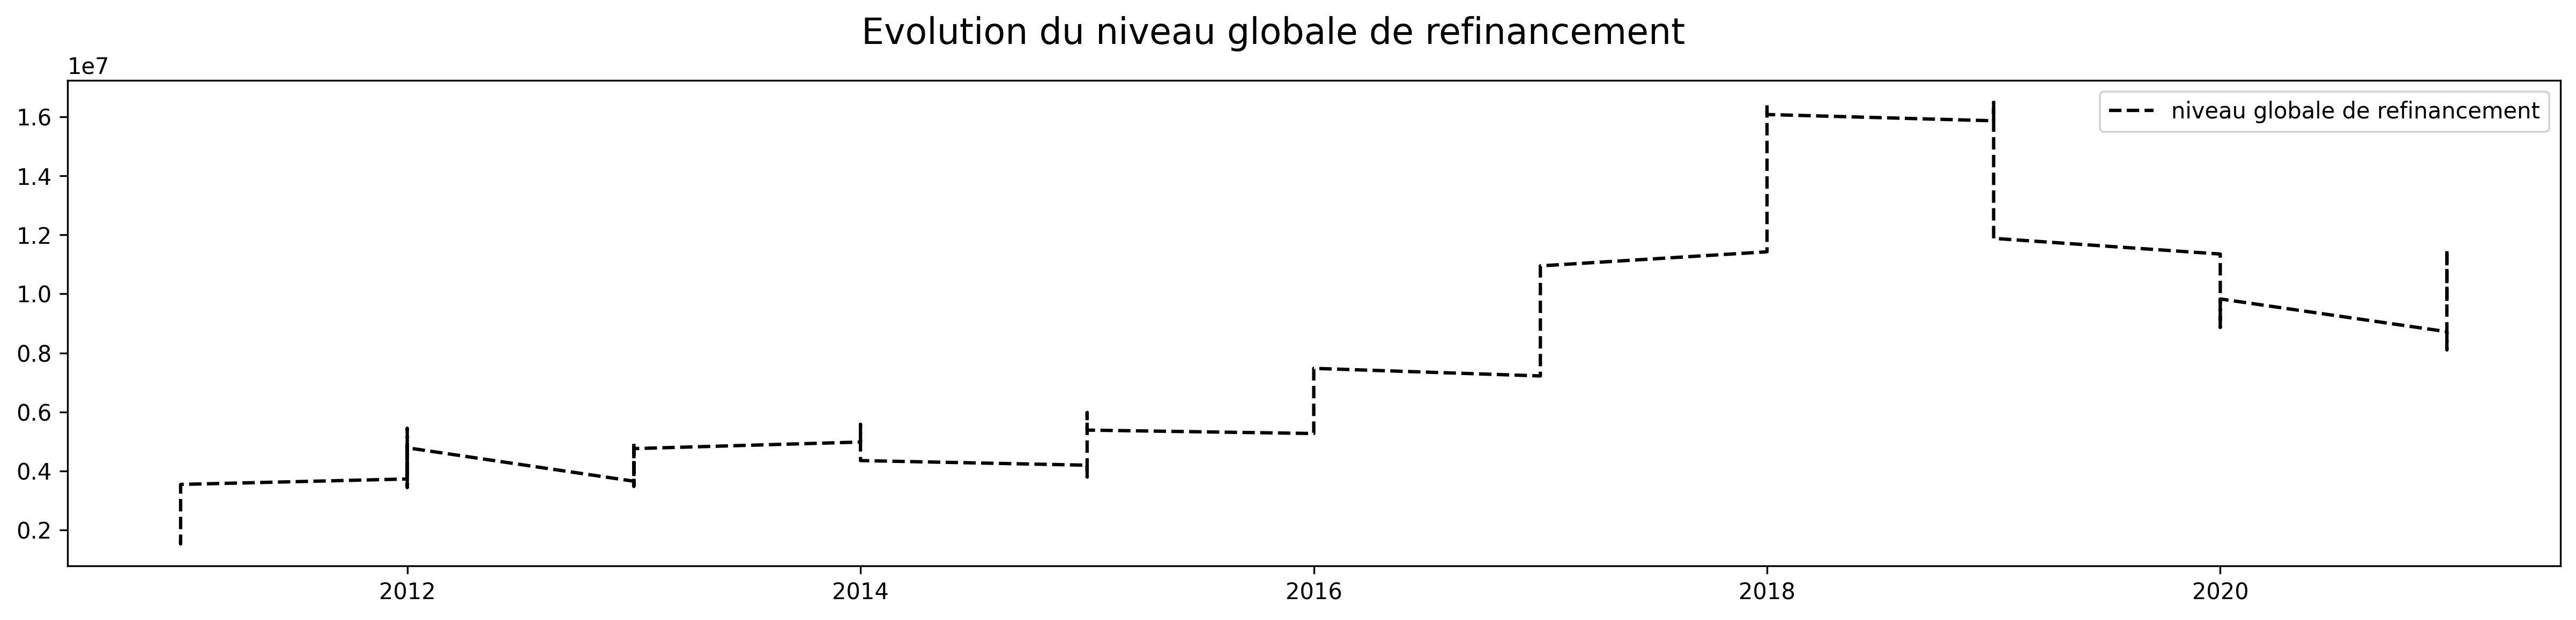

In [ ]:

y1=df['niveau globale de refinancement']
x=df["Année"]
plt.plot(x, y1, "k--", label= "niveau globale de refinancement")

plt.rcParams["figure.figsize"] = (30,4)
plt.suptitle('Evolution du niveau globale de refinancement', fontsize=16)
plt.legend()

plt.show()

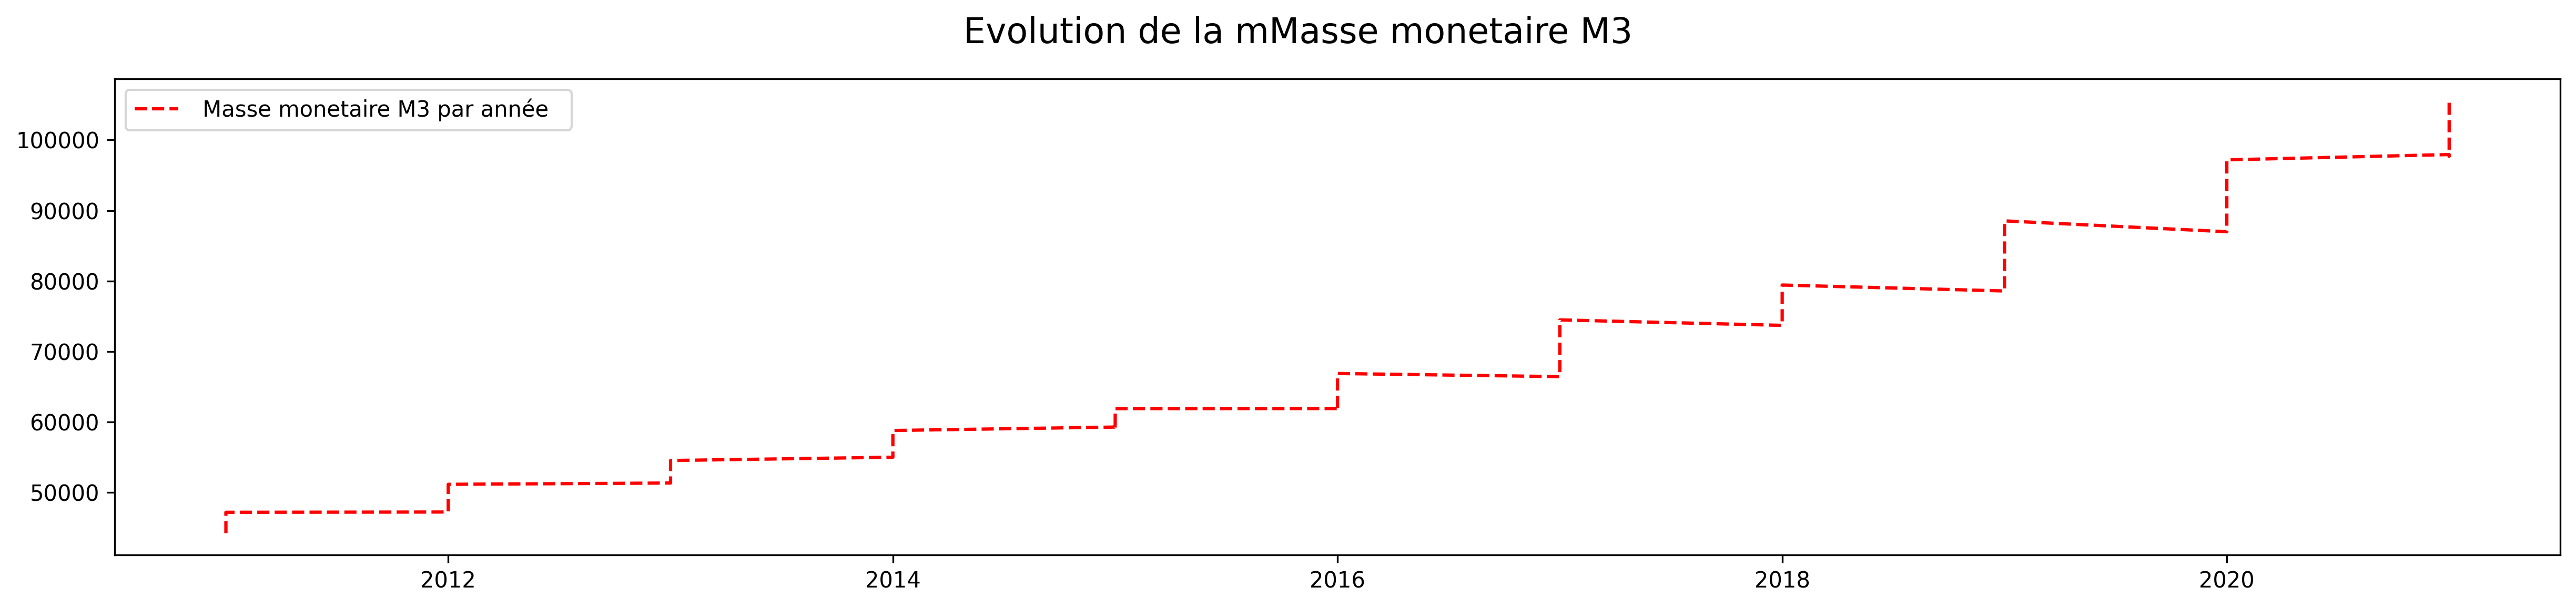

In [ ]:
y1=df['Masse monetaire M3']

x=df["Année"]
plt.plot(x, y1, "r--", label=" Masse monetaire M3 par année  ")

plt.rcParams["figure.figsize"] = (20,4)
plt.suptitle('Evolution de la mMasse monetaire M3', fontsize=16)
plt.legend()

plt.show()

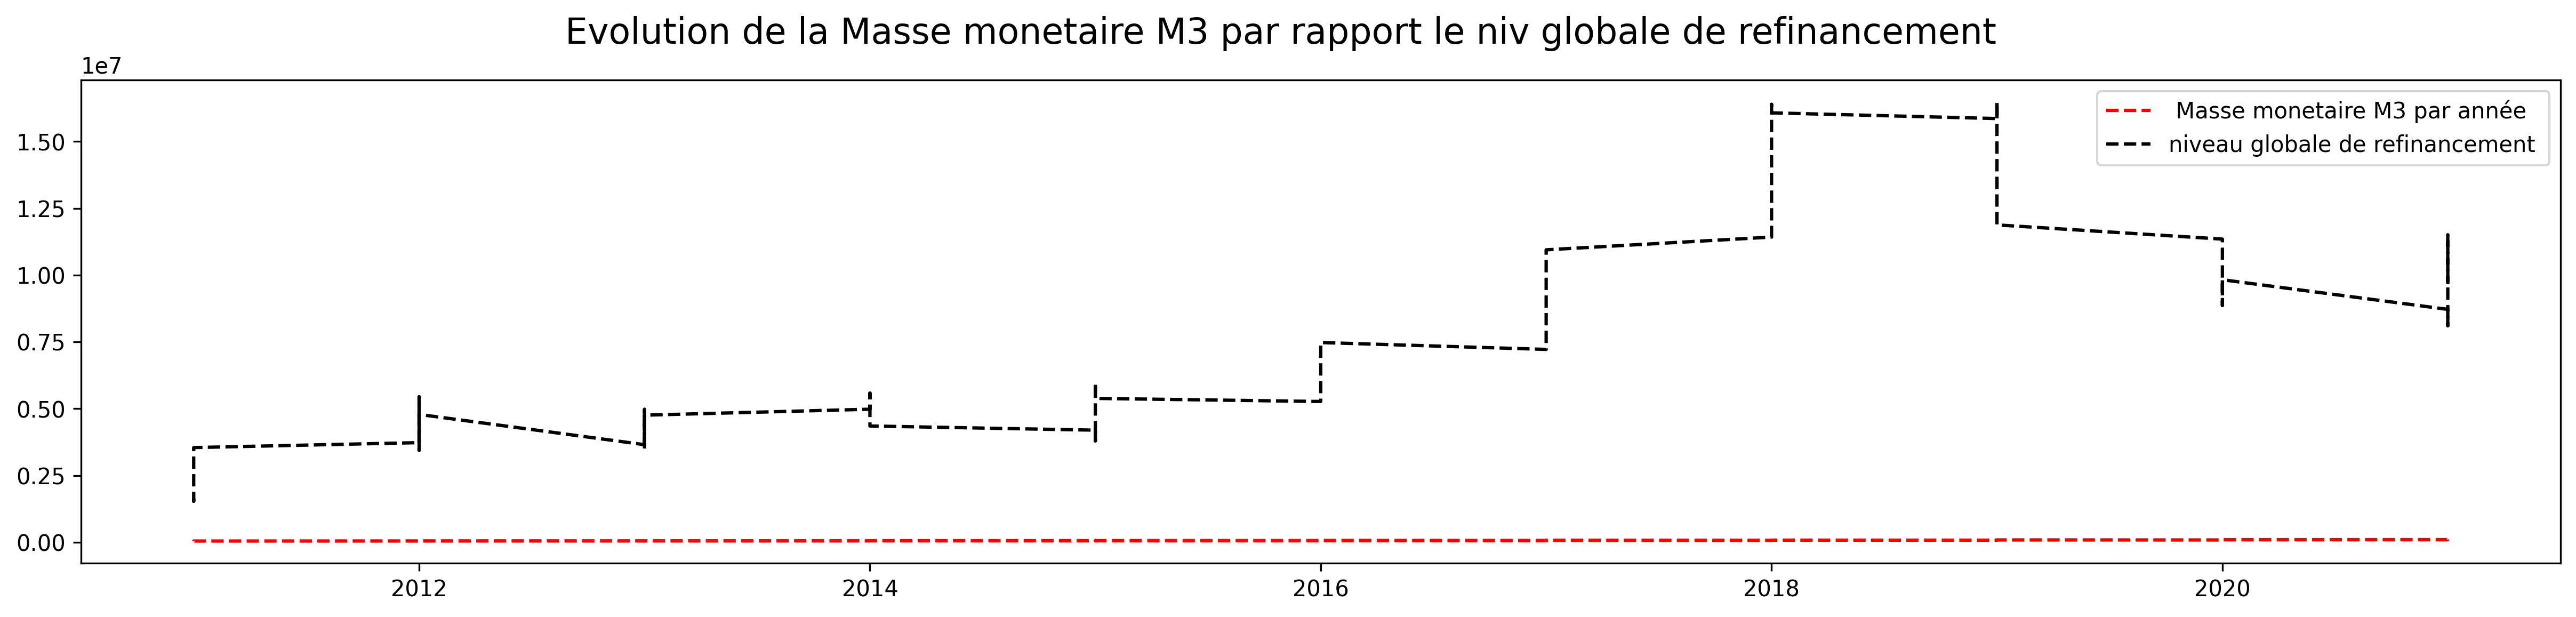

In [ ]:
y1=df['Masse monetaire M3']
y2=df['niveau globale de refinancement']
x=df["Année"]
plt.plot(x, y1, "r--", label=" Masse monetaire M3 par année  ")
plt.plot(x, y2, "k--", label='niveau globale de refinancement')

plt.rcParams["figure.figsize"] = (20,4)
plt.suptitle('Evolution de la Masse monetaire M3 par rapport le niv globale de refinancement', fontsize=16)
plt.legend()

plt.show()

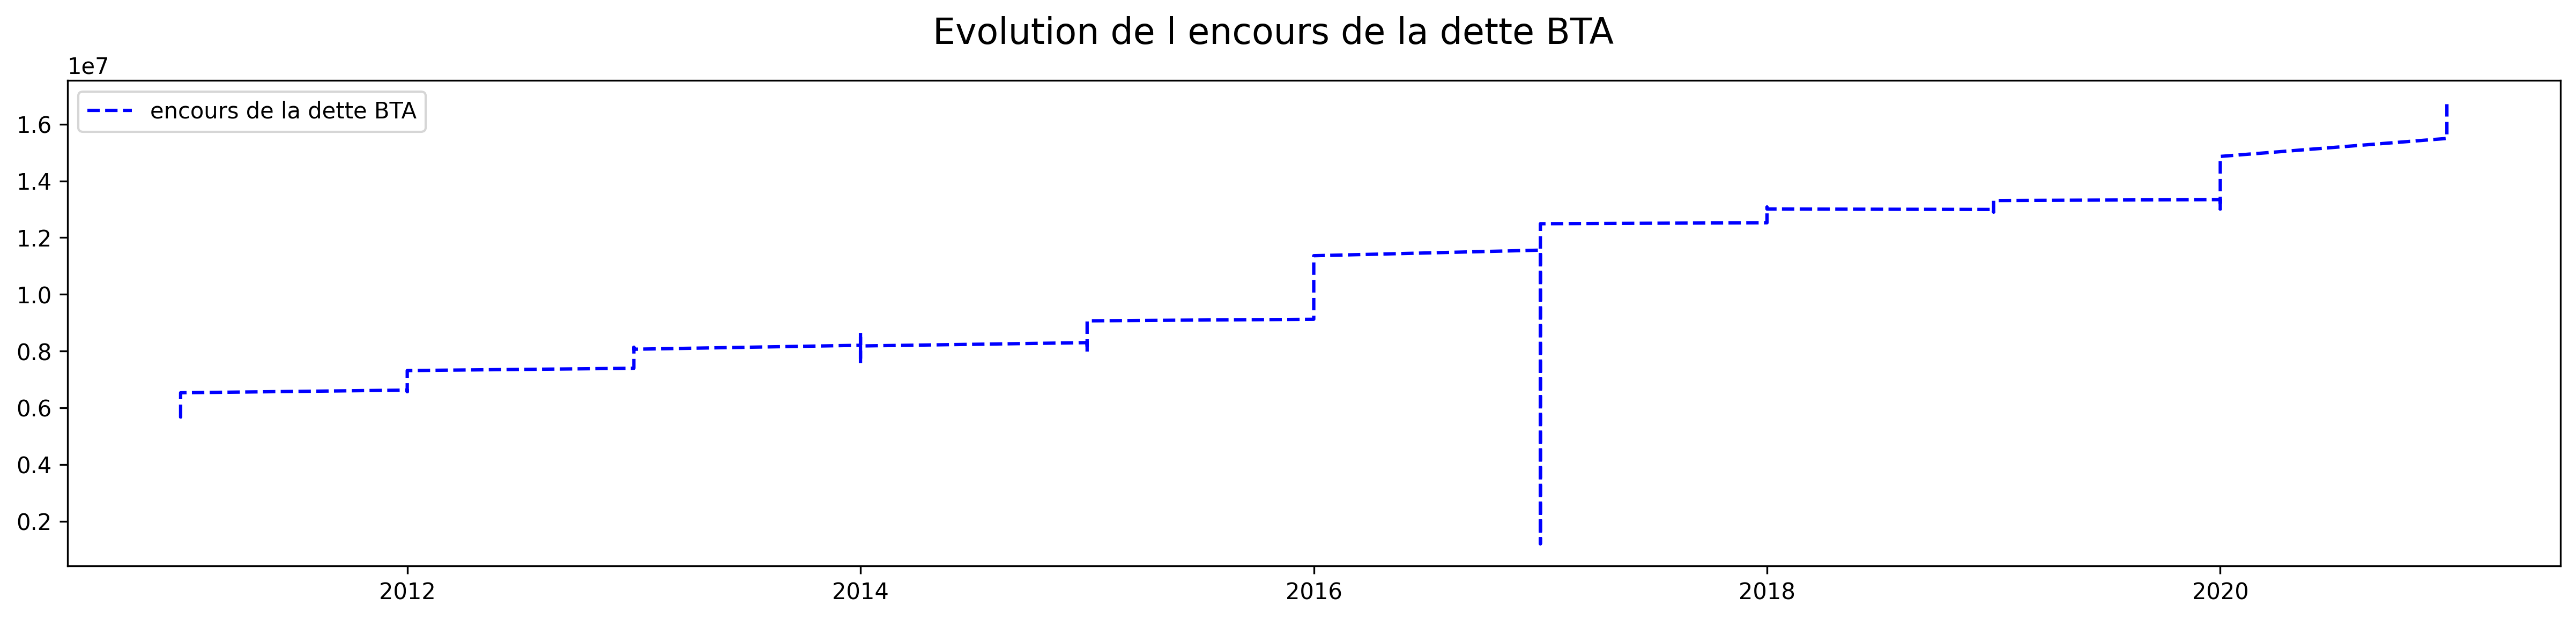

In [ ]:
y1=df['encours de la dette BTA']
x=df["Année"]
plt.plot(x1, y1, "b--", label="encours de la dette BTA")
plt.rcParams["figure.figsize"] = (20,4)
plt.suptitle('Evolution de l encours de la dette BTA', fontsize=16)

plt.legend()

plt.show()

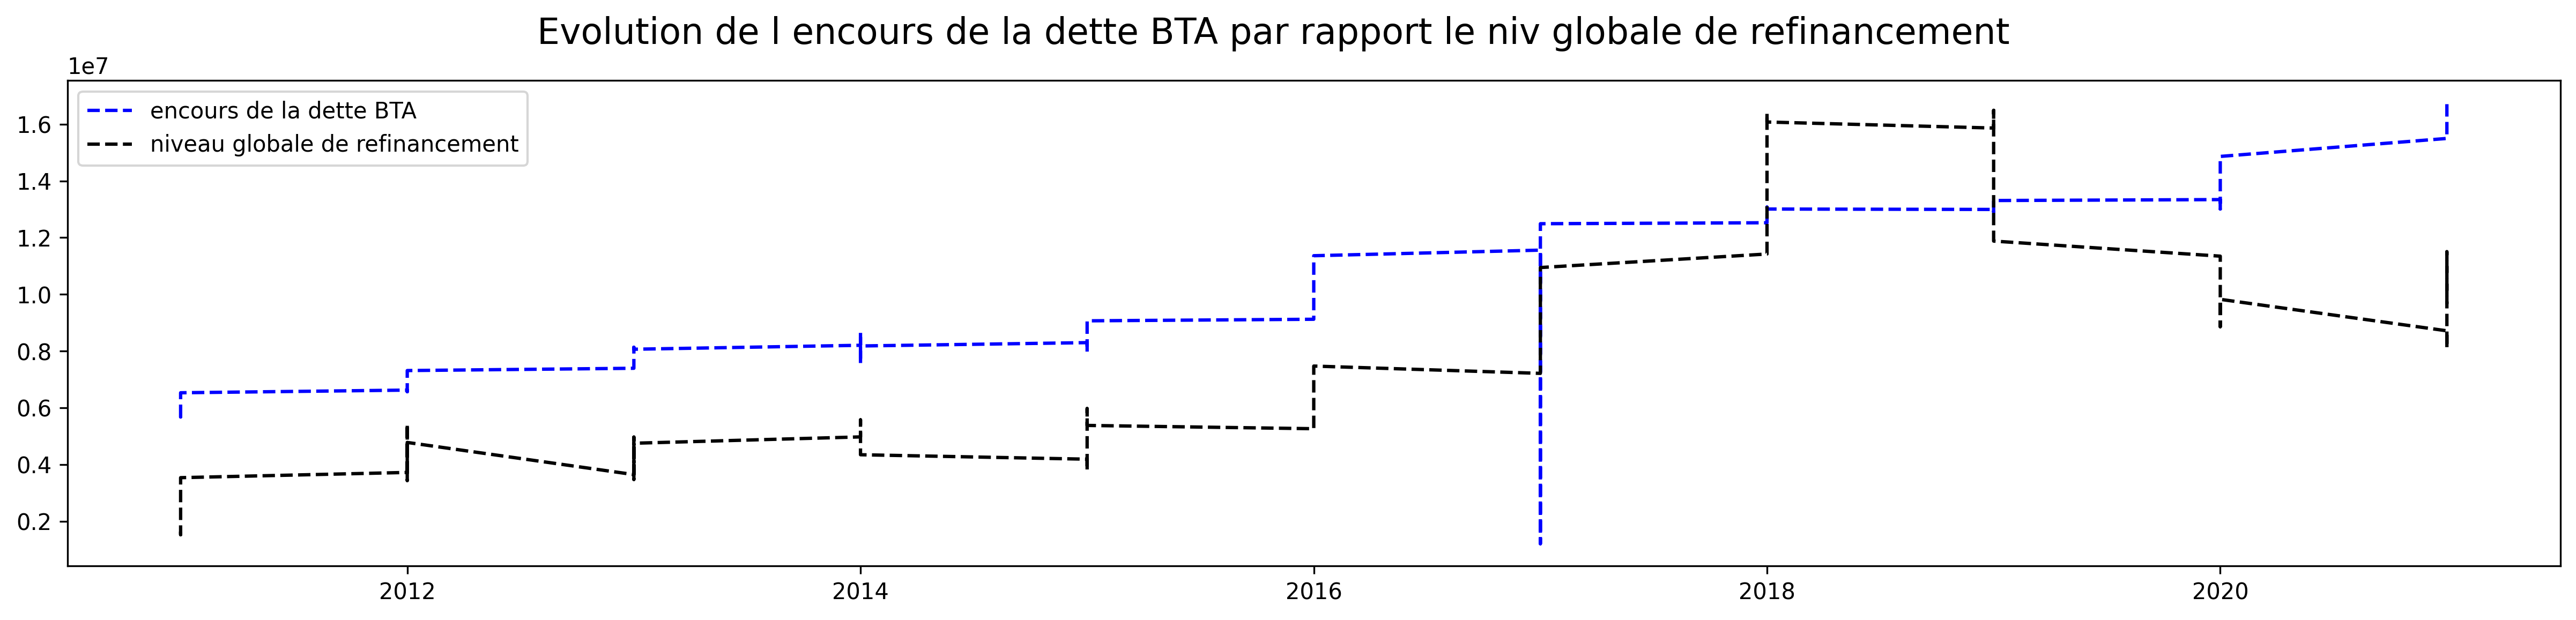

In [ ]:
y1=df['encours de la dette BTA']
y2=df['niveau globale de refinancement']
x=df["Année"]
plt.plot(x, y1, "b--", label="encours de la dette BTA")
plt.plot(x, y2, "k--", label='niveau globale de refinancement')

plt.rcParams["figure.figsize"] = (20,4)
plt.suptitle('Evolution de l encours de la dette BTA par rapport le niv globale de refinancement', fontsize=16)

plt.legend()

plt.show()

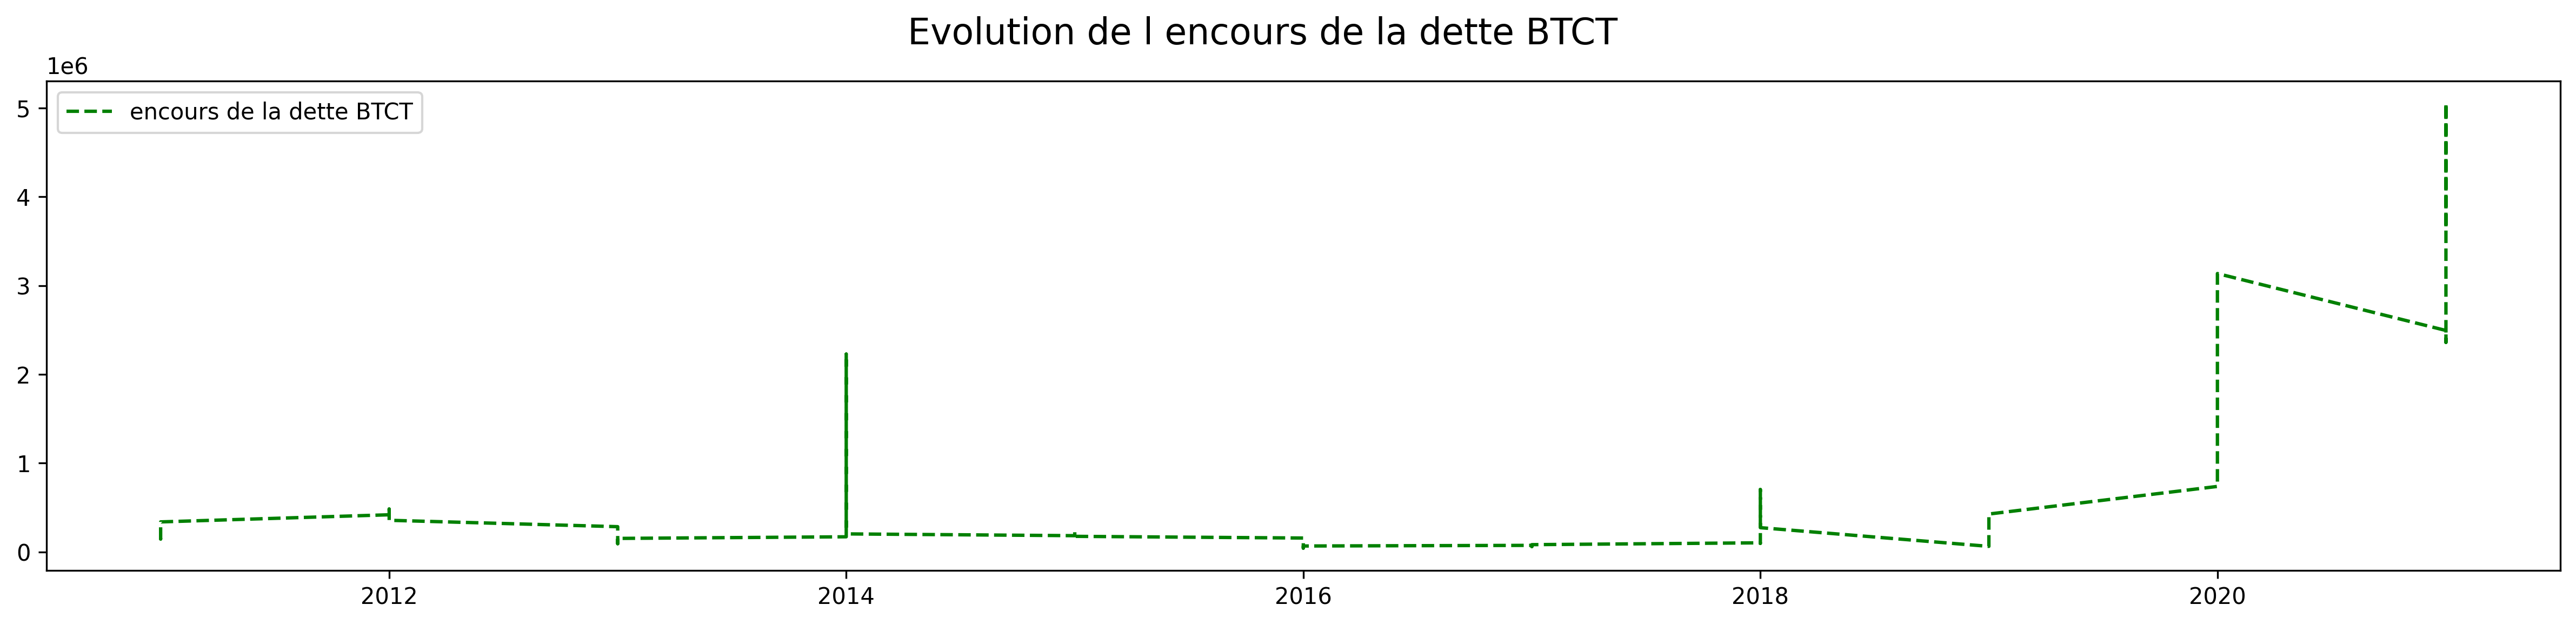

In [ ]:
y1=df['encours de la dette BTCT']
x=df["Année"]
plt.plot(x, y1, "g--", label="encours de la dette BTCT")
plt.rcParams["figure.figsize"] = (20,4)
plt.suptitle('Evolution de l encours de la dette BTCT', fontsize=16)

plt.legend()

plt.show()

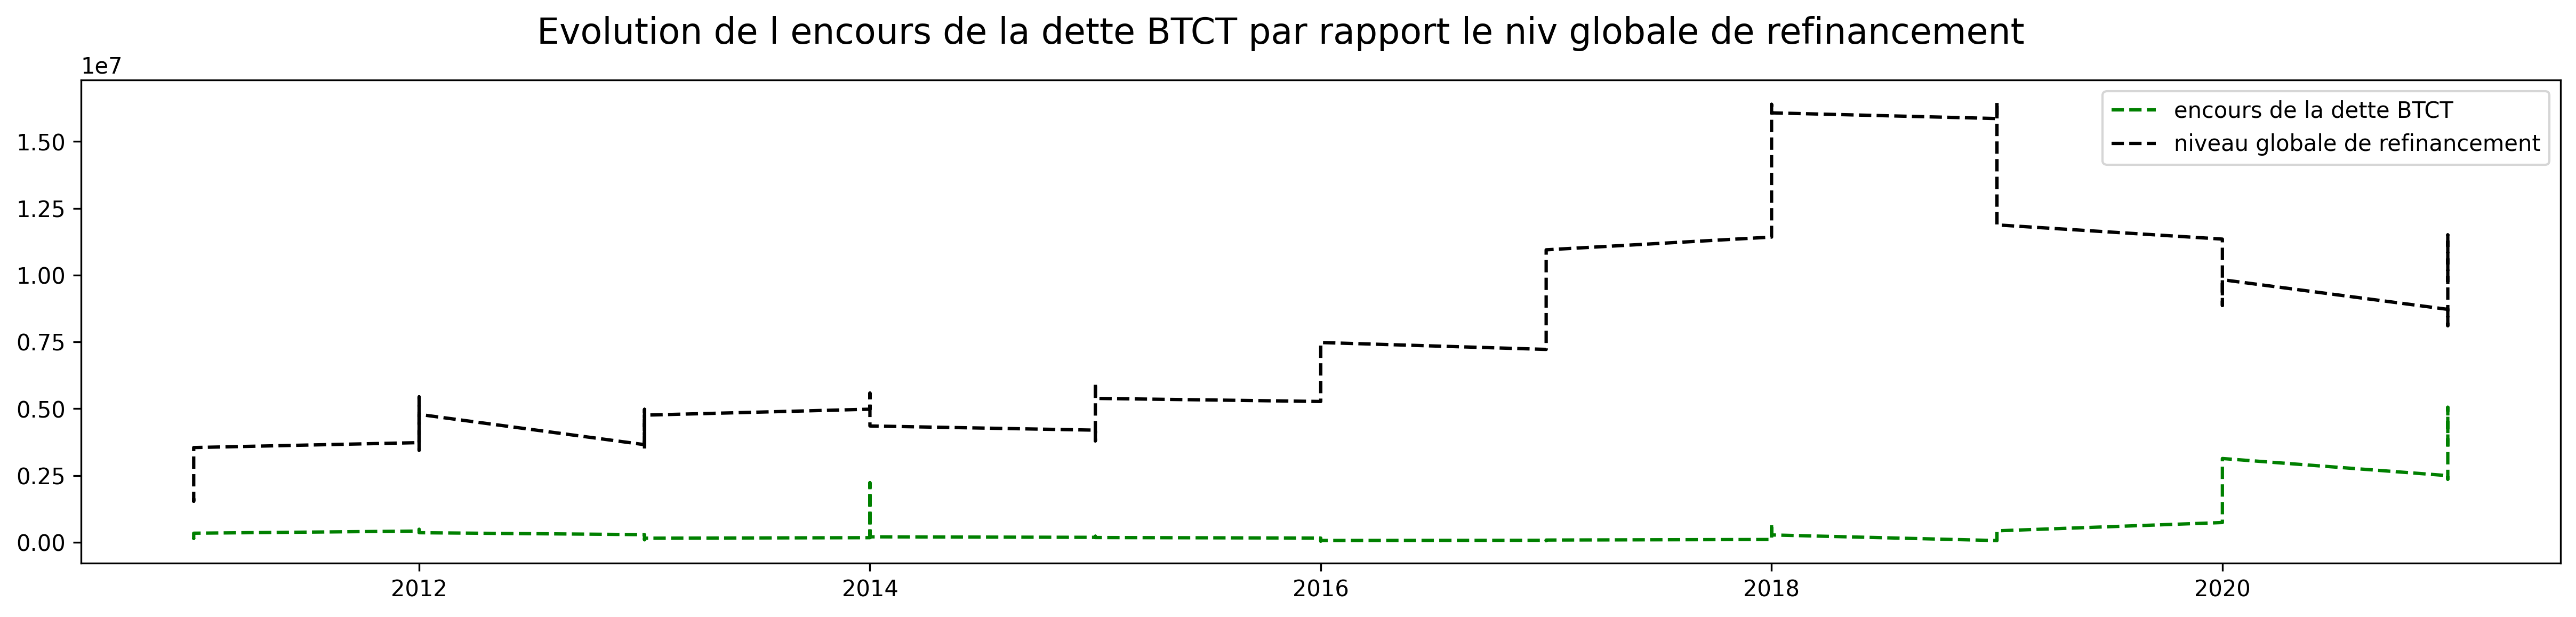

In [ ]:
y1=df['encours de la dette BTCT']
y2=df['niveau globale de refinancement']
x=df["Année"]
plt.plot(x, y1, "g--", label="encours de la dette BTCT")
plt.plot(x, y2, "k--", label='niveau globale de refinancement')

plt.rcParams["figure.figsize"] = (20,4)
plt.suptitle('Evolution de l encours de la dette BTCT par rapport le niv globale de refinancement', fontsize=16)

plt.legend()

plt.show()

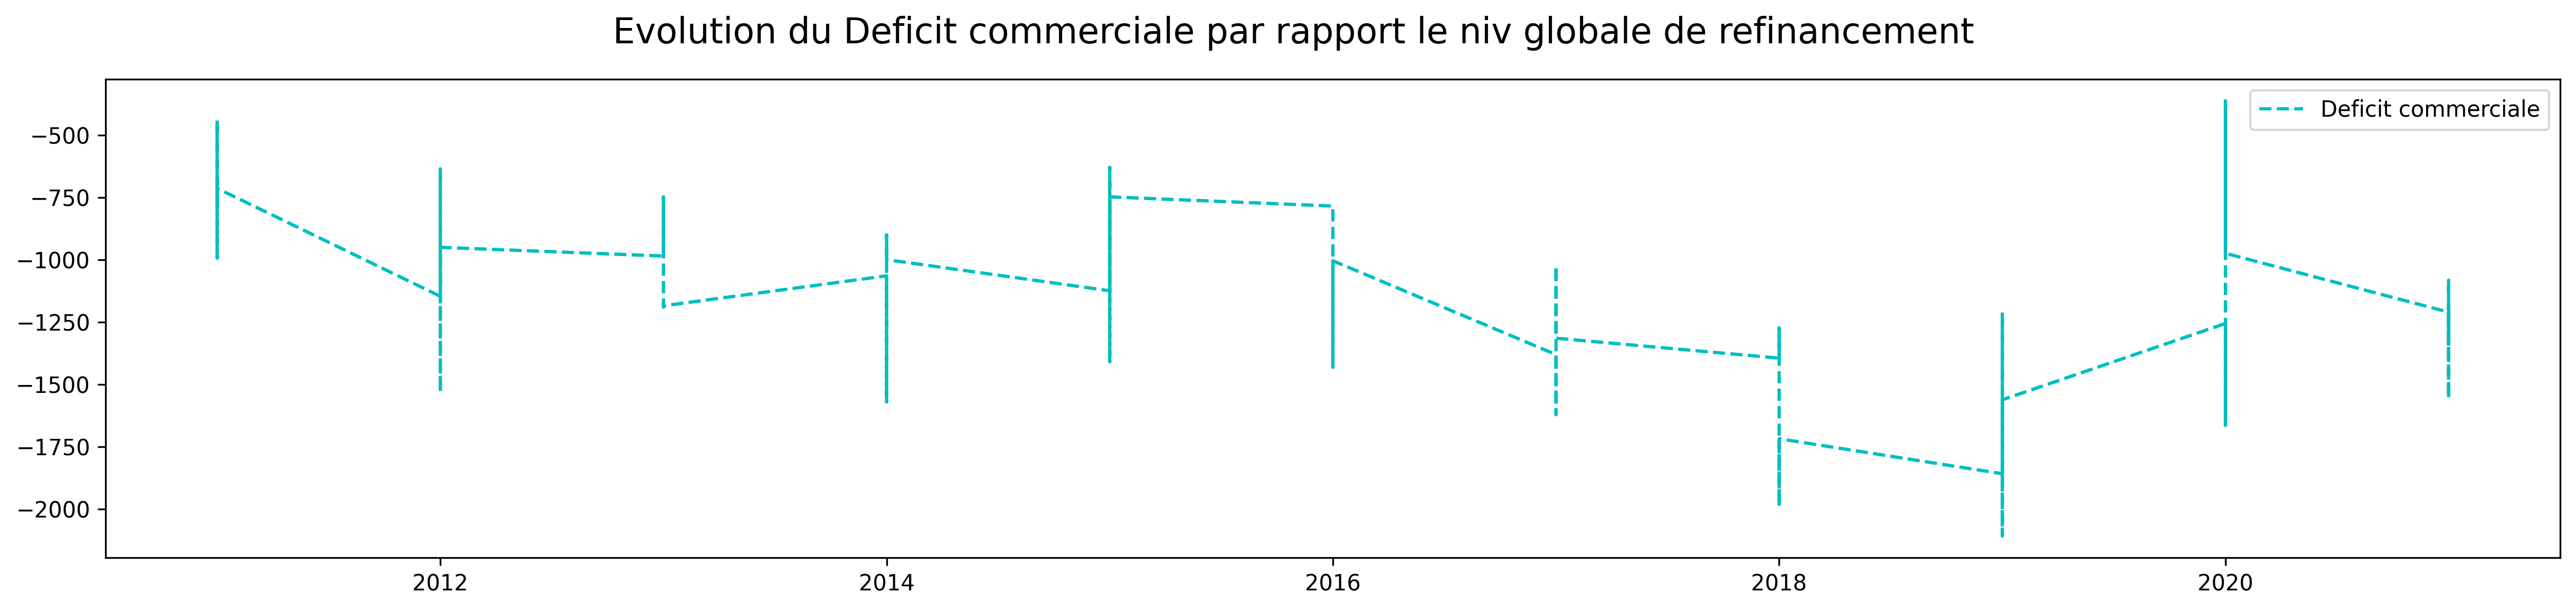

In [ ]:
y1=df['Deficit commerciale']
x=df["Année"]
plt.plot(x, y1, "c--", label="Deficit commerciale")
plt.rcParams["figure.figsize"] = (20,4)
plt.suptitle('Evolution du Deficit commerciale par rapport le niv globale de refinancement', fontsize=16)

plt.legend()

plt.show()

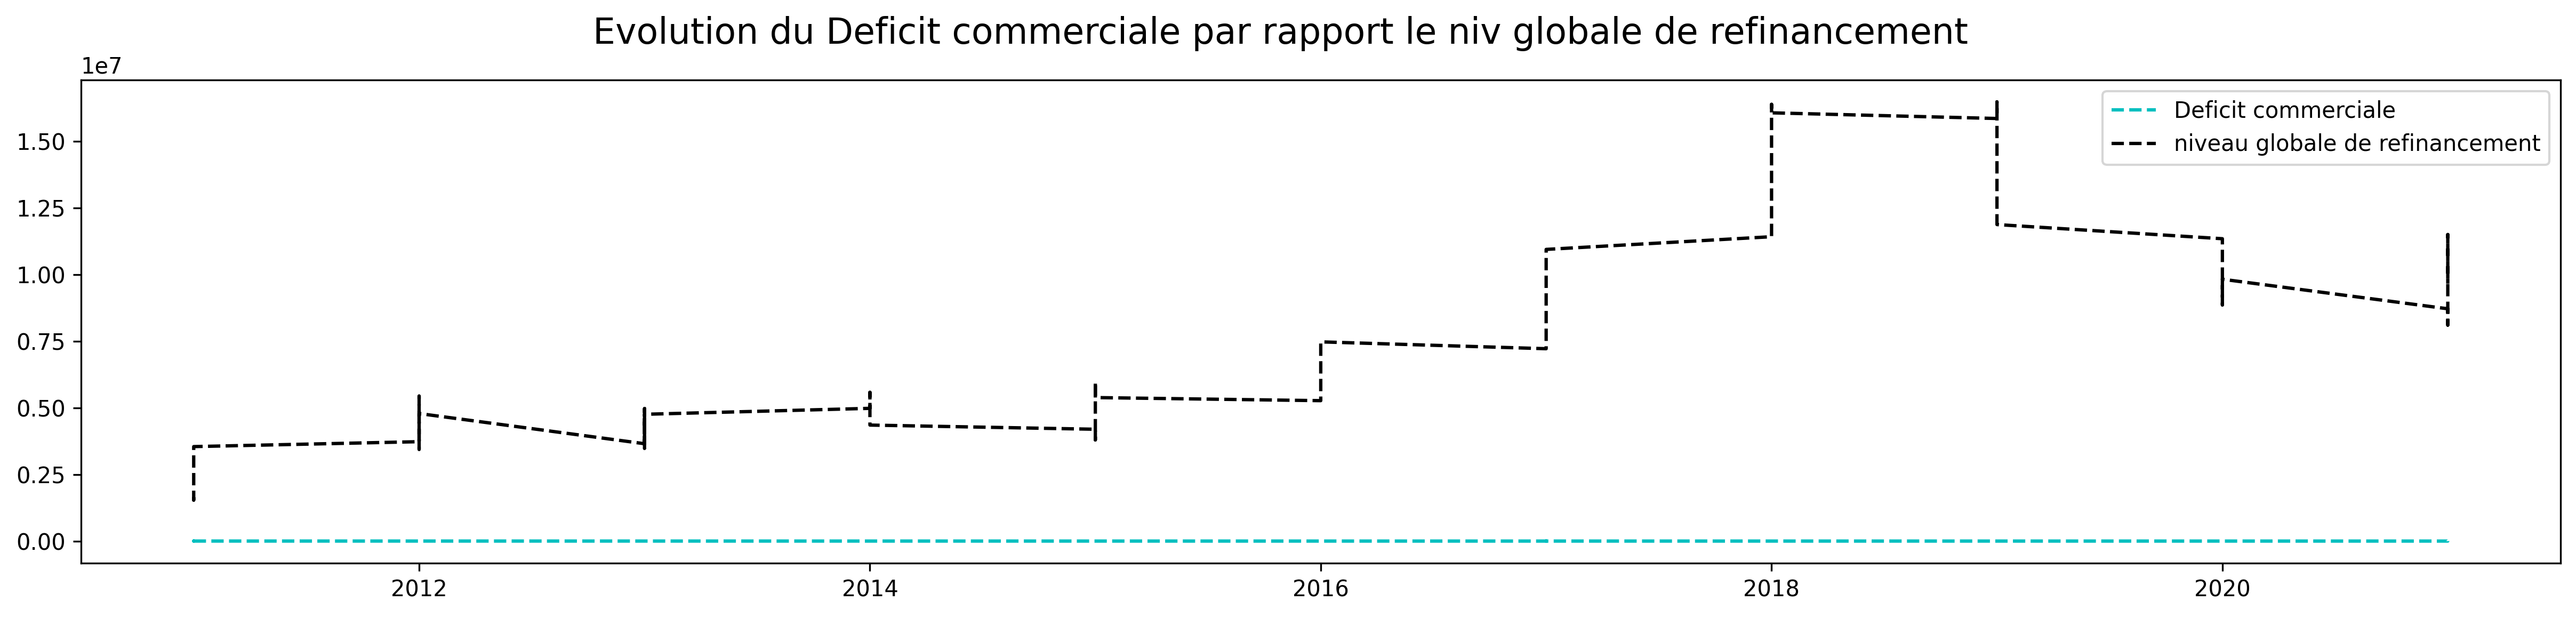

In [ ]:
y1=df['Deficit commerciale']
y2=df["niveau globale de refinancement"]
x=df["Année"]
plt.plot(x, y1, "c--", label="Deficit commerciale")
plt.plot(x, y2, "k--", label="niveau globale de refinancement")

plt.rcParams["figure.figsize"] = (20,4)
plt.suptitle('Evolution du Deficit commerciale par rapport le niv globale de refinancement', fontsize=16)

plt.legend()

plt.show()

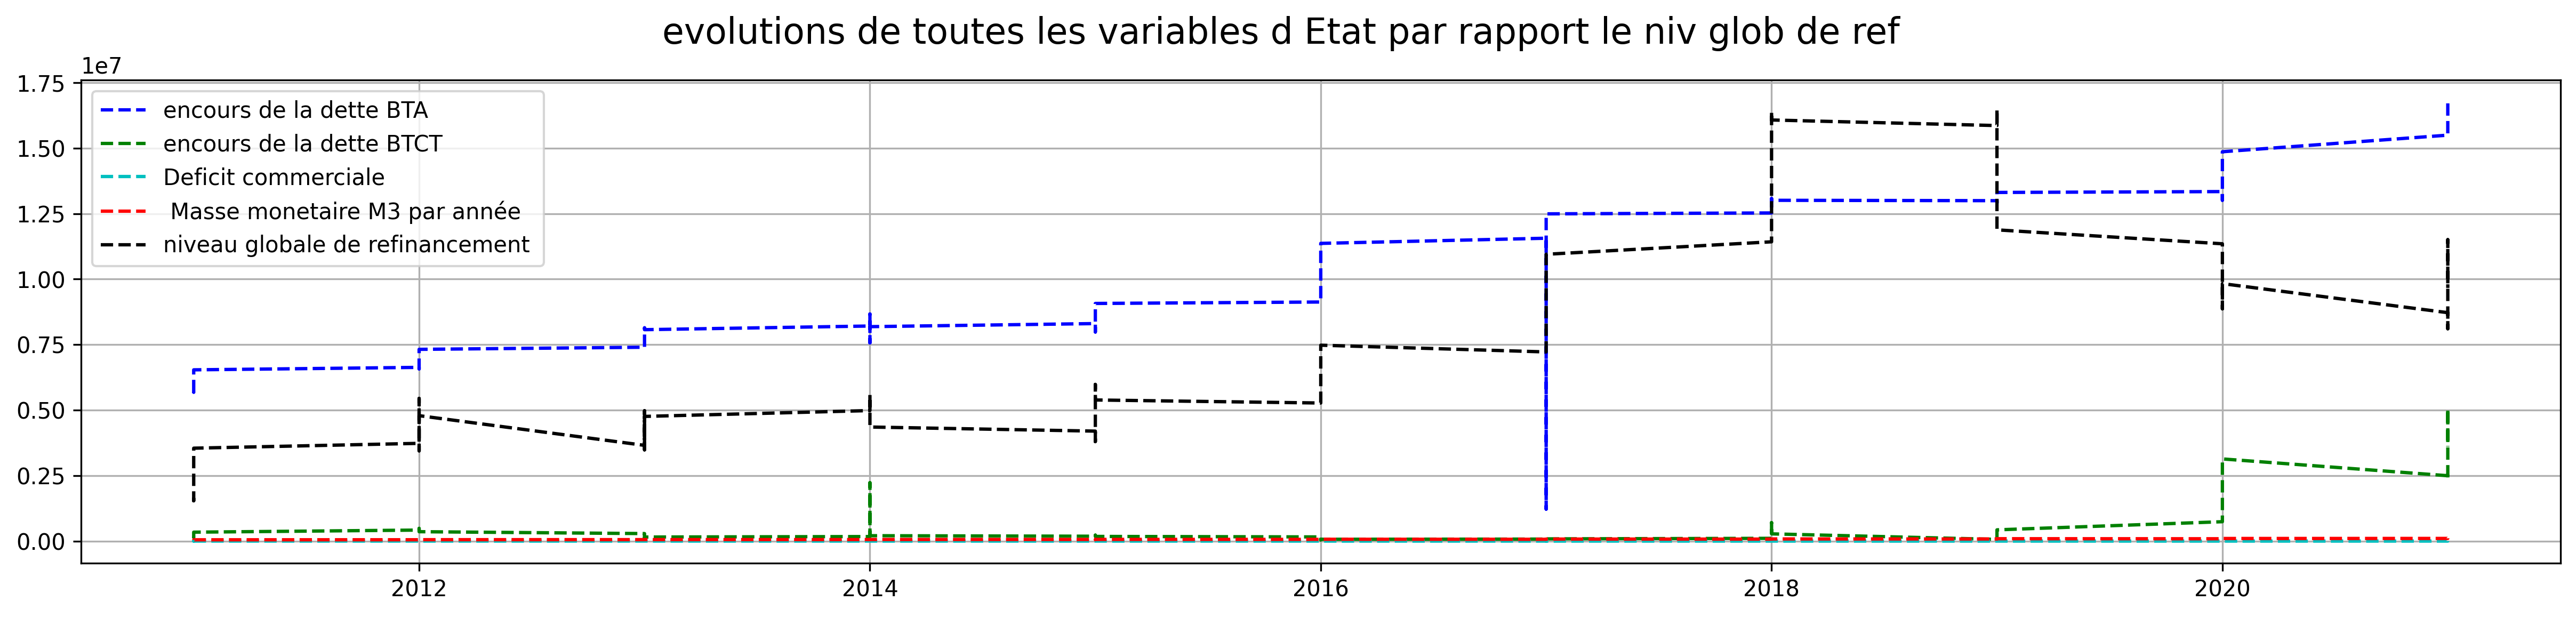

In [ ]:
import matplotlib.pyplot as plt
x = df["Année"]
y1 = df['encours de la dette BTA']
y2 = df["encours de la dette BTCT"]
y3 = df["Deficit commerciale"]
y4 = df['Masse monetaire M3']
y5 = df["niveau globale de refinancement"]
plt.plot(x, y1, "b--", label="encours de la dette BTA")
plt.plot(x, y2, "g--", label="encours de la dette BTCT")
plt.plot(x, y3, "c--", label="Deficit commerciale")
plt.plot(x, y4, "r--", label=" Masse monetaire M3 par année  ")
plt.plot(x, y5, "k--", label="niveau globale de refinancement")
plt.suptitle('evolutions de toutes les variables d Etat par rapport le niv glob de ref', fontsize=16)
plt.grid(True)
plt.rcParams["figure.figsize"] = (20,4)
plt.legend()
plt.show()

In [ ]:
df.corr()

,Année,encours de la dette BTA,encours de la dette BTCT,Masse monetaire M3,Deficit commerciale,niveau globale de refinancement,degradation selon fitch,degradation selon Moody s,degradation selon S&P
Année,1.000000e+00,0.939863,0.601937,0.975540,-0.573652,0.785194,-3.290468e-15,0.042912,-0.287527
encours de la dette BTA,9.398631e-01,1.000000,0.648110,0.945522,-0.558422,0.753084,-6.825591e-02,0.043172,-0.254750
encours de la dette BTCT,6.019367e-01,0.648110,1.000000,0.728605,-0.116113,0.233882,-4.498602e-02,0.124519,-0.099889
Masse monetaire M3,9.755403e-01,0.945522,0.728605,1.000000,-0.512074,0.728141,-1.105551e-02,0.043870,-0.252271
Deficit commerciale,-5.736524e-01,-0.558422,-0.116113,-0.512074,1.000000,-0.738755,7.377588e-03,-0.012777,0.206802
niveau globale de refinancement,7.851938e-01,0.753084,0.233882,0.728141,-0.738755,1.000000,-1.041703e-02,-0.006344,-0.244749
degradation selon fitch,-3.290468e-15,-0.068256,-0.044986,-0.011056,0.007378,-0.010417,1.000000e+00,-0.043565,0.103955
degradation selon Moody s,4.291191e-02,0.043172,0.124519,0.043870,-0.012777,-0.006344,-4.356507e-02,1.000000,0.133254
degradation selon S&P,-2.875273e-01,-0.254750,-0.099889,-0.252271,0.206802,-0.244749,1.039554e-01,0.133254,1.000000


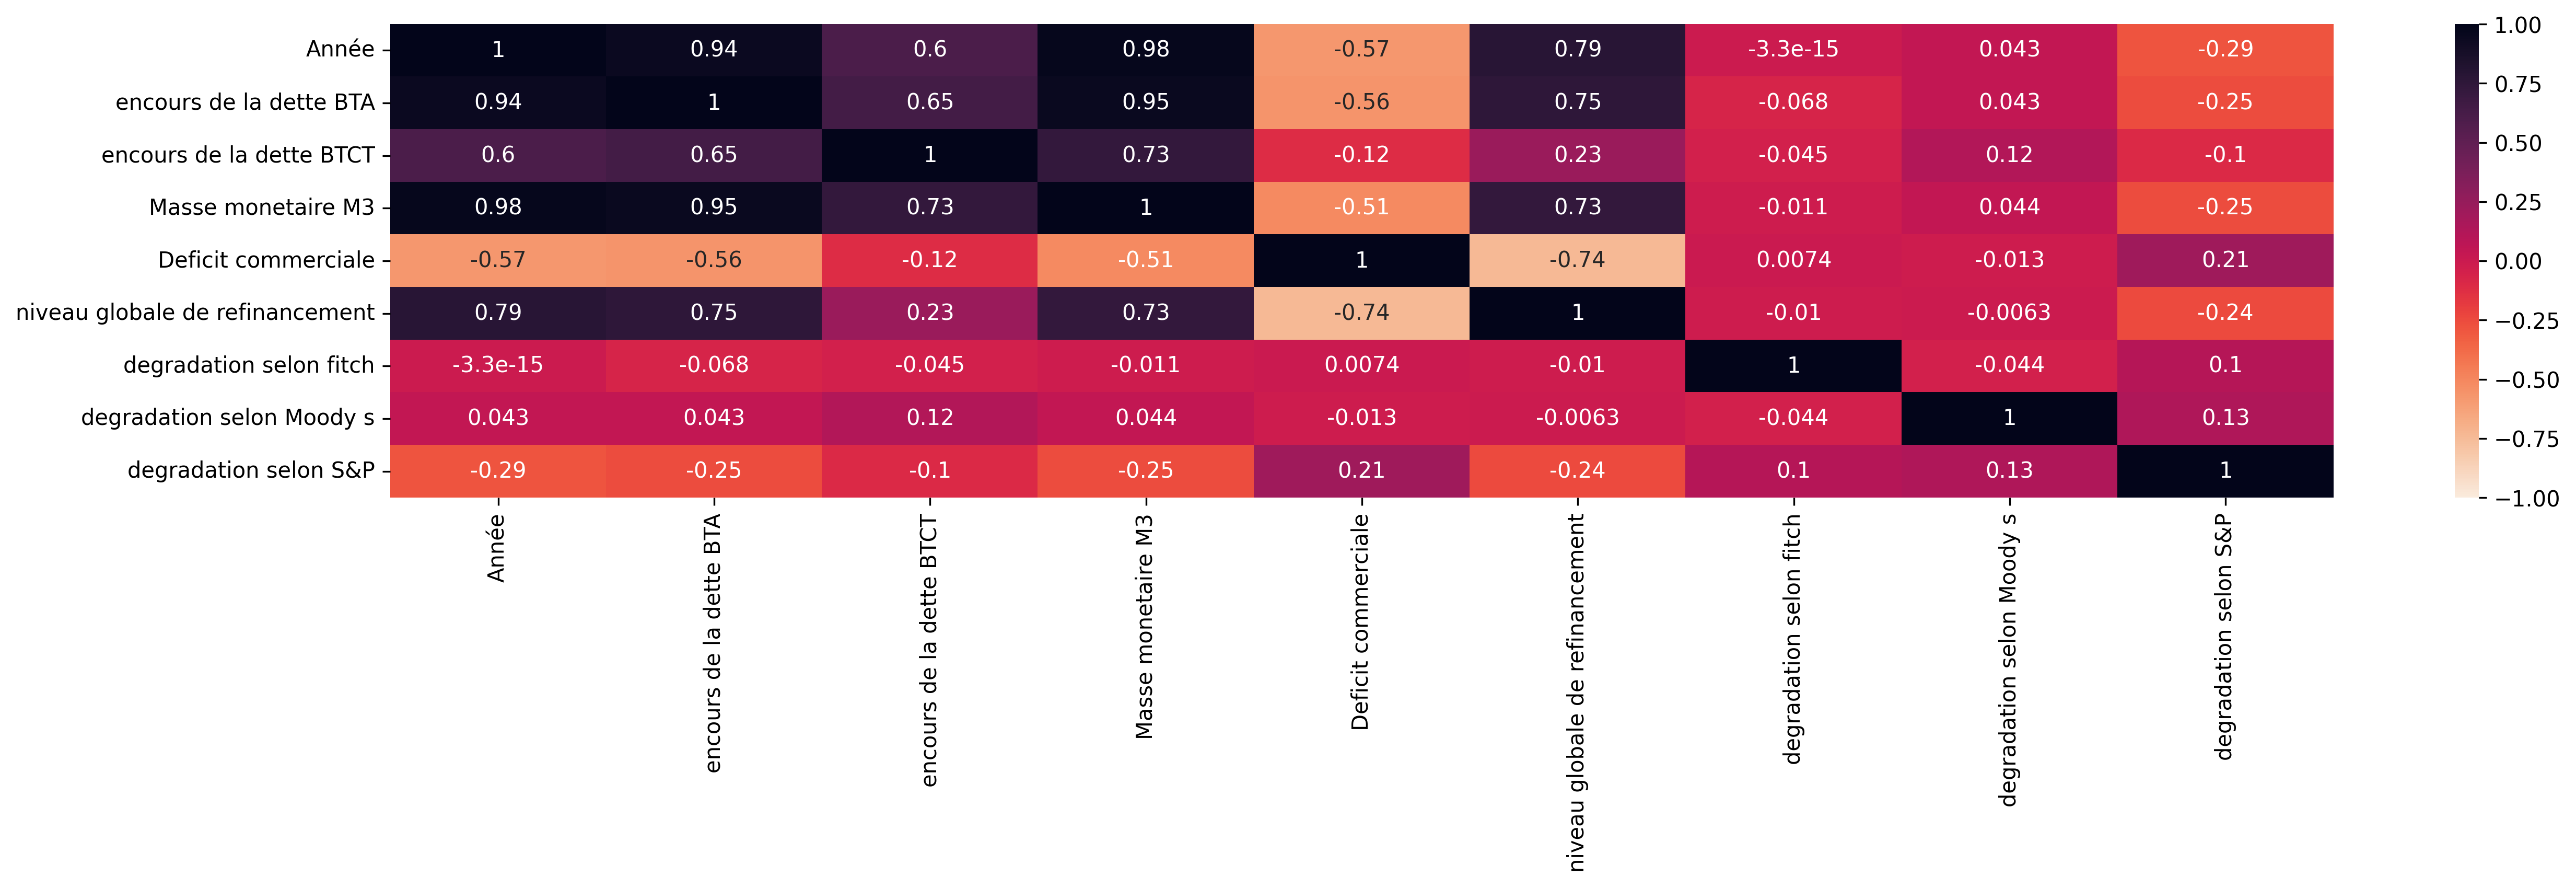

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

In [1]:
print(df['Deficit commerciale'].corr(df['niveau globale de refinancement'],method='spearman'))
print(df['encours de la dette BTA'].corr(df['niveau globale de refinancement'], method='spearman'))

print(df['encours de la dette BTCT'].corr(df['niveau globale de refinancement'], method='spearman'))
print(df['Masse monetaire M3'].corr(df['niveau globale de refinancement'], method='spearman'))
print(df['degradation de la note'].corr(df['niveau globale de refinancement'], method='spearman'))

NameError: ignored

**partie linear regression a regler !!**

In [ ]:
#Choosing the features as x and the target as y
x=df[['encours de la dette BTA','encours de la dette BTCT','Masse monetaire M3','Deficit commerciale']]
y=df['niveau globale de refinancement']

In [ ]:

#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # pour la visualization

#  separation entre train et test

from sklearn.model_selection import train_test_split
#importer les foction qu on va utiliser par la suite
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # pour la visualization

#  separation entre train et test

from sklearn.model_selection import train_test_split
#importer les foction qu on va utiliser par la suite
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
x=df[["encours de la dette BTA","encours de la dette BTCT"]]  #we have more than one input
y=df["niveau globale de refinancement"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))



ValueError: ignored

In [ ]:
model.coef_#LA valeur de a

AttributeError: ignored

TypeError: ignored

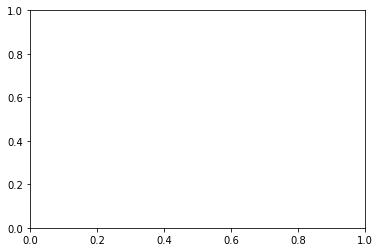

In [ ]:
plt.scatter(x,y,color="r")                   #pour definir les axes  #scatter plot ta3ml ni9at
plt.title("Linear Regression")        
plt.ylabel("niveau globale de refinancement")                         
plt.xlabel("Masse monetaire")
plt.plot(x,model.predict(x),color="k")       #visualization des erreurs et des valeurs justes
plt.show()